## Laboratorio 5 - Modelación y Simulación
### Ejercicio 3

Stefano Aragoni, Carol Arévalo, Luis Santos

----------------

Cree una simulación de mercado utilizando modelos basados en agentes. Modele múltiples segmentos de mercado con diferentes preferencias y estrategias de precios dinámicas.
Requisitos:
1. Cree una clase de Comprador con subclases para diferentes segmentos de compradores.
2. Modele diferentes preferencias para segmentos de compradores, como compradores de "lujo" que están dispuestos a pagar más y compradores de "presupuesto" que buscan precios más bajos.
3. Introduzca una estrategia de precios dinámica en la que los precios se ajusten en función de la oferta y la demanda.
4. Simule las interacciones del comprador y visualice la dinámica del mercado.
----------------

#### Librerías

En esta sección se importan las librerías necesarias para el desarrollo del ejercicio.

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Polygon
from PIL import Image
from matplotlib.lines import Line2D 
from IPython.display import display, Image as IPImage 

-----------

#### Clases de Agentes

En esta sección se declaraon las clases de los agentes

In [122]:
class Comprador:
    def __init__(self, nombre, presupuesto):
        self.nombre = nombre
        self.presupuesto = presupuesto
        self.probabilidadCompra = 0.5
        self.preferencia = "indiferente"

    def comprar(self, precio):
        if self.presupuesto >= precio and random.random() < self.probabilidadCompra:
            self.presupuesto -= precio
            return True
        else:
            return False

class CompradorLujo(Comprador):
    def __init__(self, nombre, presupuesto):
        super().__init__(nombre, presupuesto)
        self.preferencia = "lujo"
        self.probabilidadCompra = 0.9

class CompradorPresupuesto(Comprador):
    def __init__(self, nombre, presupuesto):
        super().__init__(nombre, presupuesto)
        self.preferencia = "presupuesto"
        self.probabilidadCompra = 0.3

class Mercado:
    def __init__(self, demanda, oferta, precio_base):
        self.demanda = demanda
        self.oferta = oferta
        self.precio_base = precio_base

    def ajustarPrecio(self):
        precio_ajustado = self.precio_base * (1 + (self.demanda - self.oferta) / self.demanda)
        return precio_ajustado

----------------

#### Creación y Simulación

En esta sección se crean los agente y se simula su funcionamiento. 

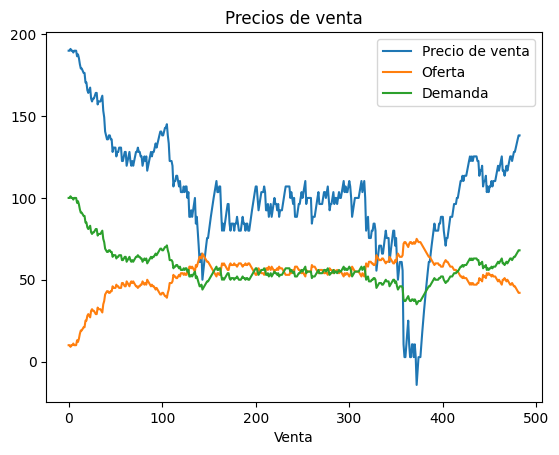

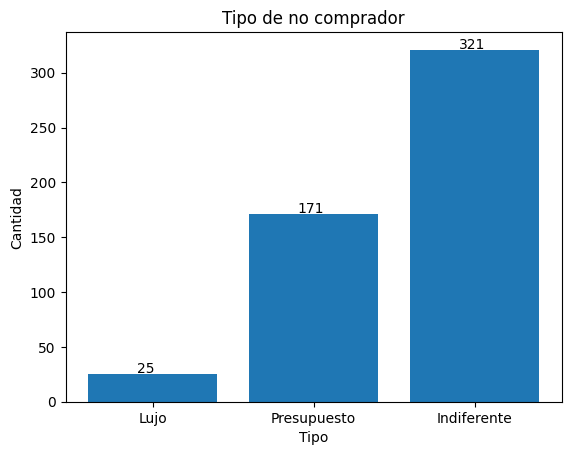

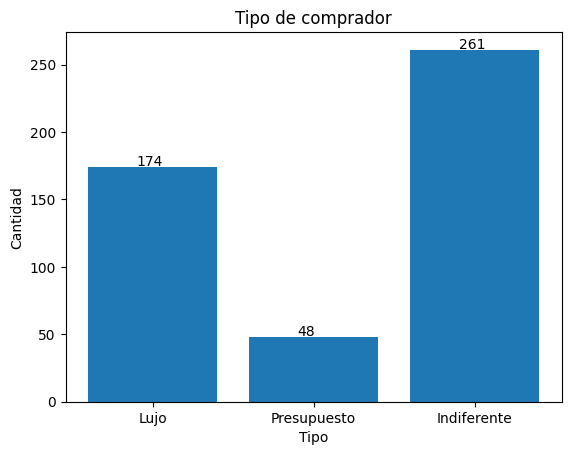

In [123]:
numCompradores = 1000

compradores = []

for i in range(numCompradores):
    if random.random() < 0.2:
        compradores.append(CompradorLujo("Comprador " + str(i), random.randint(100, 1000)))
    elif random.random() < 0.75:
        compradores.append(Comprador("Comprador " + str(i), random.randint(100, 500)))
    else:
        compradores.append(CompradorPresupuesto("Comprador " + str(i), random.randint(100, 200)))

mercado = Mercado(100, 10, 100)

preciosVenta = []
compradoresCompraron = []
ofertaEnCadaIteracion = []
demandasEnCadaIteracion = []

tipoDeNoComprador = []
tipoDeComprador = []

for comprador in compradores:
    precioActual = mercado.ajustarPrecio()

    if comprador.comprar(precioActual):
        tipoDeComprador.append(comprador.preferencia)
        ofertaEnCadaIteracion.append(mercado.oferta)
        demandasEnCadaIteracion.append(mercado.demanda)
        preciosVenta.append(precioActual)
        compradoresCompraron.append(comprador.nombre)

        mercado.oferta -= 1
        mercado.demanda += 1

    else:
        tipoDeNoComprador.append(comprador.preferencia)

        mercado.oferta += 1
        mercado.demanda -= 1        
    
plt.plot(preciosVenta)
plt.plot(ofertaEnCadaIteracion)
plt.plot(demandasEnCadaIteracion)
plt.title("Precios de venta")
plt.xlabel("Venta")
plt.legend(["Precio de venta", "Oferta", "Demanda"])
plt.show()

plt.bar(["Lujo", "Presupuesto", "Indiferente"], [tipoDeNoComprador.count("lujo"), tipoDeNoComprador.count("presupuesto"), tipoDeNoComprador.count("indiferente")])
plt.title("Tipo de no comprador")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
for i, v in enumerate([tipoDeNoComprador.count("lujo"), tipoDeNoComprador.count("presupuesto"), tipoDeNoComprador.count("indiferente")]):
    plt.text(i - 0.1, v + 1, str(v))
plt.show()

plt.bar(["Lujo", "Presupuesto", "Indiferente"], [tipoDeComprador.count("lujo"), tipoDeComprador.count("presupuesto"), tipoDeComprador.count("indiferente")])
plt.title("Tipo de comprador")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
for i, v in enumerate([tipoDeComprador.count("lujo"), tipoDeComprador.count("presupuesto"), tipoDeComprador.count("indiferente")]):
    plt.text(i - 0.1, v + 1, str(v))


#### Preguntas
1. ¿Qué comportamientos puede observar en los diferentes tipos de preferencias y estrategias? 

Se puede observar que los compradores de lujo son los que más compran, ya que están dispuestos a pagar más por los productos, mientras que los compradores de presupuesto son los que menos compran, ya que buscan precios más bajos. Adicionalmente, se puede observar que los compradores indiferentes se distribuyen de manera muy similar entre compradores y no compradores, ya que su probabilidad de compra es de 0.5. Aun así, los compradores indiferentes pueden llegar a no comprar el producto por precios muy altos, ya que no tienen el presupuesto tan alto como los compradores de lujo.

2. ¿Cómo mejoraría este modelo?

Este modelo se podria mejorar tomando en cuenta el tipo de producto que se está vendiendo, ya que no todos los productos tienen la misma demanda. Por ejemplo, si se está vendiendo un producto de lujo, se podría aumentar la probabilidad de compra de los compradores de lujo, y disminuir la probabilidad de compra de los compradores de presupuesto. 